<a href="https://colab.research.google.com/github/Imokut/my-tensorflow-learning/blob/main/intro_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Callback class**

In [37]:
import tensorflow as tf

# callback on traing limit
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>= 0.7):
      print('\nReachedd 70% accuracy so stop training')
      self.model.stop_training = True

callbacks_limit = myCallback()

# display training progress with dot
class progressDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0 : print("")
    print('-', end='')

# callback after no loss improvement
stopLoss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


load the data

In [1]:
# fist code from coursera

import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


checkout the data

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

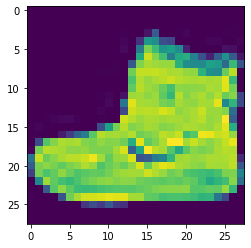

In [3]:
import numpy as np
import matplotlib.pyplot as plt
index = 0
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
plt.imshow(training_images[index])

normalize the pixel values

In [4]:
training_images = training_images/255
test_images = test_images/255

In [33]:
print(len(training_labels))

60000


In [5]:
display(test_labels[:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Building the model

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [28]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f42f4c0a850>>


In [40]:
model.fit(training_images, training_labels, epochs=500, callbacks=[stopLoss])

Epoch 1/500
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2032 - accuracy: 0.9232
Epoch 2/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1977 - accuracy: 0.9253
Epoch 3/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1922 - accuracy: 0.9275
Epoch 4/500
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1862 - accuracy: 0.9293
Epoch 5/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1763 - accuracy: 0.9342
Epoch 6/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1743 - accuracy: 0.9337
Epoch 7/500
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1692 - accuracy: 0.9359
Epoch 8/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1619 - accuracy: 0.9387
Epoch 9/500
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1587 - accuracy: 0.9397
Epoch 10/500
1875/1875 [==============================] - 11s 6m

In [41]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8860 - accuracy: 0.8883


[0.8860352635383606, 0.8883000016212463]

In [32]:
classifications = model.predict(test_images)
print(np.argmax(classifications[20]))
print(test_labels[20])


313/313 [==============================] - 1s 3ms/step
2
2
